In [91]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [92]:
RESULT_DIR = "./results/results_paper"

In [93]:
def get_latest_results_file(result_dir):    
    list_of_files = glob.glob(result_dir + '/*.csv') 
    latest_file = None
    if list_of_files:
        latest_file = max(list_of_files, key=os.path.getctime)
    return latest_file

In [94]:
results_file = get_latest_results_file(RESULT_DIR)
df = pd.read_csv(results_file)
display(df)

,dataset,optimizer,iteration,variation,runtime
0,Coffee,ssg-1000-1,22_259148844947086765,0.681415,1422.400345
1,Coffee,ssg-1000-1,26_278625044165697214,0.685753,1695.456543
2,Coffee,ssg-1000-1,6_725852498275213106,0.682278,1811.617571
3,Coffee,ssg-1000-1,0_702019484231540807,0.674569,2088.686428
4,Coffee,ssg-1000-1,2_2159828416395092062,0.675968,2112.318295
...,...,...,...,...,...
776,FaceFour,sgld-1000-1,4_1556514841362417168,111.080669,99142.358861
777,FaceFour,sgld-1000-1,1_1317793824542017275,42.972072,99528.593535
778,FaceFour,sgld-1000-1,22_1743659966747101889,41.586950,99315.780923
779,OSULeaf,sgld-1000-10,11_1063609276188576724,587.185620,59521.582559


In [95]:
filter_func = lambda x: x['iteration'].count() != 30 or x['variation'].count() != 30 or x['runtime'].count() != 30
df.groupby(['dataset', 'optimizer']).filter(filter_func)

,dataset,optimizer,iteration,variation,runtime
779,OSULeaf,sgld-1000-10,11_1063609276188576724,587.18562,59521.582559


In [96]:
unfinshed_datasets = df.groupby(['dataset', 'optimizer']).filter(filter_func)['dataset'].unique()
unfinshed_datasets

array(['OSULeaf'], dtype=object)

In [97]:
filter_datasets = [] # list(unfinshed_datasets)#  + ['FaceFour']
filter_datasets

[]

In [98]:
df_filtered = df[~df.dataset.isin(filter_datasets)]

In [99]:
df_grouped = df_filtered.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
display(df_grouped)

variation                  runtime  \
                                             mean        std          mean   
dataset                  optimizer                                           
Coffee                   adam-1000-1     0.693506   0.023482   2289.669516   
                         adam-1000-10    0.957467   0.211432   2325.463411   
                         sgld-1000-1     0.746898   0.020084  24570.233185   
                         sgld-1000-10    0.850453   0.331120   4823.515612   
                         ssg-1000-1      0.700734   0.037962   2194.866095   
                         ssg-1000-10     0.865833   0.076729   2428.448016   
FaceFour                 adam-1000-1    48.873069   8.335562   2934.701551   
                         adam-1000-10   72.831306  19.671799   3340.163729   
                         sgld-1000-1    49.919388  20.376840  82176.784732   
                         sgld-1000-10   72.462138  25.864241   8096.293405   
                         ssg-1000-1     35.773728   1.382439   2252.095421   
                         ssg-1000-10    42.708183   2.617225   3761.564156   
OSULeaf                  adam-1000-1    47.699730  13.955416   5121.514115   
                         adam-1000-10   83.091452  27.598879   6424.169322   
                         sgld-1000-10  587.185620        NaN  59521.582559   
                         ssg-1000-1     28.382545   0.521617   5239.828726   
                         ssg-1000-10    42.516232   3.505978   6224.075192   
OliveOil                 adam-1000-1     0.031623   0.001625   5123.255717   
                         adam-1000-10    0.031171   0.001978   5908.406628   
                         sgld-1000-1     0.113838   0.009189   4607.304139   
                         sgld-1000-10    0.113311   0.014062   4832.427570   
                         ssg-1000-1      0.030715   0.000661   2941.970681   
                         ssg-1000-10     0.033804   0.004238   5369.989915   
PhalangesOutlinesCorrect adam-1000-1     3.402319   2.861835    365.494702   
                         adam-1000-10    2.678300   1.206371    342.214019   
                         ssg-1000-1      2.744971   1.213071    378.405017   
                         ssg-1000-10     2.767646   1.189340    359.206855   

                                                     
                                                std  
dataset                  optimizer                   
Coffee                   adam-1000-1      48.211470  
                         adam-1000-10     22.877431  
                         sgld-1000-1    2955.611765  
                         sgld-1000-10   1245.294631  
                         ssg-1000-1      206.521058  
                         ssg-1000-10      69.699280  
FaceFour                 adam-1000-1     384.405513  
                         adam-1000-10    121.894228  
                         sgld-1000-1   12835.818388  
                         sgld-1000-10   1390.020480  
                         ssg-1000-1      306.337539  
                         ssg-1000-10      67.568239  
OSULeaf                  adam-1000-1     427.384720  
                         adam-1000-10    164.512204  
                         sgld-1000-10           NaN  
                         ssg-1000-1      311.618212  
                         ssg-1000-10     352.499036  
OliveOil                 adam-1000-1     878.537011  
                         adam-1000-10   1587.240303  
                         sgld-1000-1     521.951802  
                         sgld-1000-10    275.867731  
                         ssg-1000-1      943.614959  
                         ssg-1000-10     444.312072  
PhalangesOutlinesCorrect adam-1000-1      26.866985  
                         adam-1000-10     27.819869  
                         ssg-1000-1       21.357771  
                         ssg-1000-10      24.263950

In [100]:
df_variation = df_filtered.drop(columns=['runtime'])
df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])

variation           
                                             mean        std
dataset                  optimizer                          
Coffee                   adam-1000-1     0.693506   0.023482
                         adam-1000-10    0.957467   0.211432
                         sgld-1000-1     0.746898   0.020084
                         sgld-1000-10    0.850453   0.331120
                         ssg-1000-1      0.700734   0.037962
                         ssg-1000-10     0.865833   0.076729
FaceFour                 adam-1000-1    48.873069   8.335562
                         adam-1000-10   72.831306  19.671799
                         sgld-1000-1    49.919388  20.376840
                         sgld-1000-10   72.462138  25.864241
                         ssg-1000-1     35.773728   1.382439
                         ssg-1000-10    42.708183   2.617225
OSULeaf                  adam-1000-1    47.699730  13.955416
                         adam-1000-10   83.091452  27.598879
                         sgld-1000-10  587.185620        NaN
                         ssg-1000-1     28.382545   0.521617
                         ssg-1000-10    42.516232   3.505978
OliveOil                 adam-1000-1     0.031623   0.001625
                         adam-1000-10    0.031171   0.001978
                         sgld-1000-1     0.113838   0.009189
                         sgld-1000-10    0.113311   0.014062
                         ssg-1000-1      0.030715   0.000661
                         ssg-1000-10     0.033804   0.004238
PhalangesOutlinesCorrect adam-1000-1     3.402319   2.861835
                         adam-1000-10    2.678300   1.206371
                         ssg-1000-1      2.744971   1.213071
                         ssg-1000-10     2.767646   1.189340

In [101]:
df_plot = df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
df_plot.columns = df_plot.columns.to_flat_index()
df_plot.reset_index(inplace=True)

df_plot = pd.melt(df_plot, id_vars=['dataset', 'optimizer'])
display(df_plot)

,dataset,optimizer,variable,value
0,Coffee,adam-1000-1,"(variation, mean)",0.693506
1,Coffee,adam-1000-10,"(variation, mean)",0.957467
2,Coffee,sgld-1000-1,"(variation, mean)",0.746898
3,Coffee,sgld-1000-10,"(variation, mean)",0.850453
4,Coffee,ssg-1000-1,"(variation, mean)",0.700734
5,Coffee,ssg-1000-10,"(variation, mean)",0.865833
6,FaceFour,adam-1000-1,"(variation, mean)",48.873069
7,FaceFour,adam-1000-10,"(variation, mean)",72.831306
8,FaceFour,sgld-1000-1,"(variation, mean)",49.919388
9,FaceFour,sgld-1000-10,"(variation, mean)",72.462138


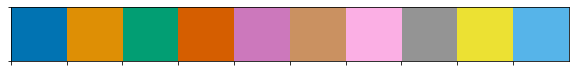

In [102]:
sns.palplot(sns.color_palette("colorblind"))

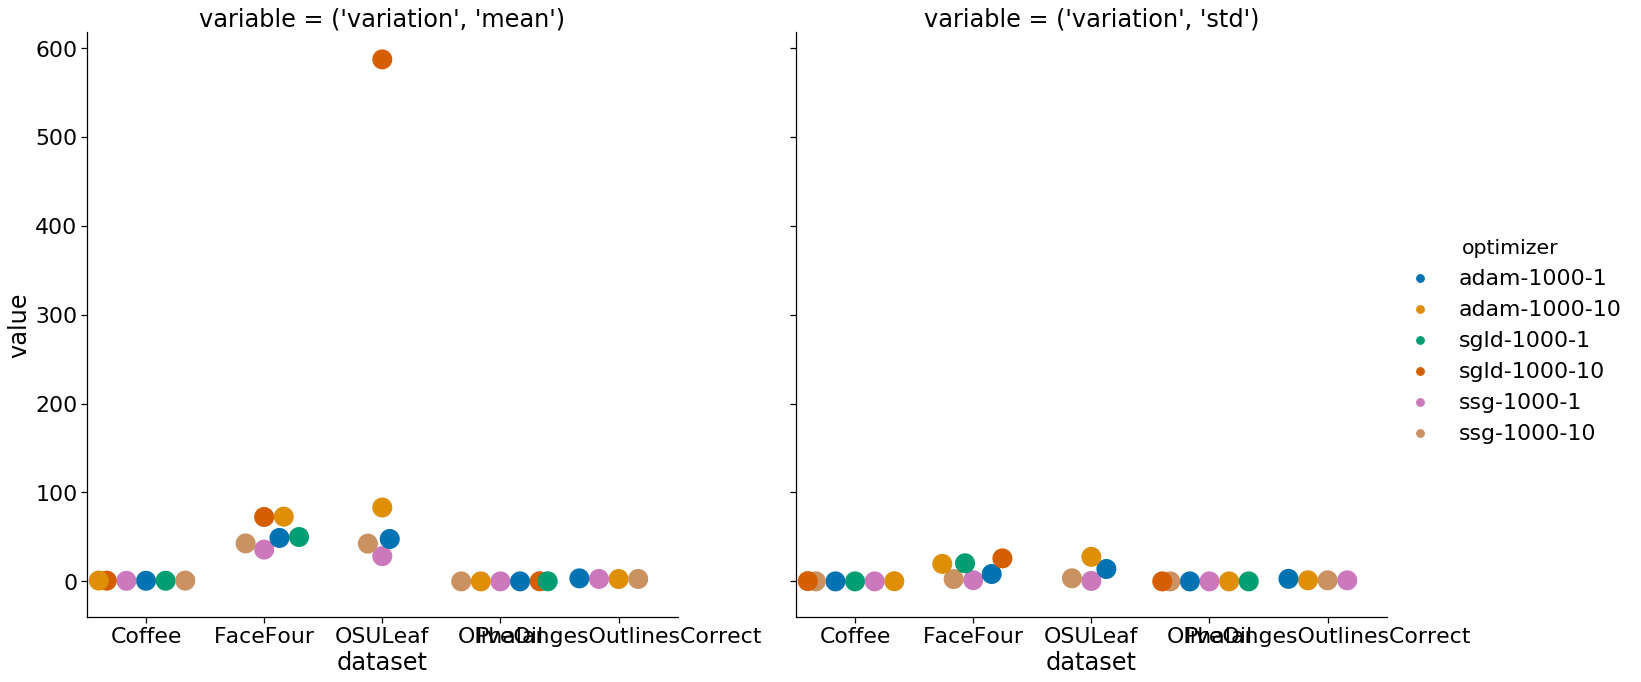

In [103]:
with sns.plotting_context('notebook', font_scale=2):
    sns.catplot(x='dataset', y='value', hue='optimizer', col='variable', data=df_plot, height=10, s=20, kind='swarm', palette='colorblind')

In [104]:
REFERENCE_FILE = "reference/5-sets_reference-results.csv"
df_r = pd.read_csv(REFERENCE_FILE)
df_r.groupby(['dataset']).mean()

,mean,std
dataset,,
Adiac,0.588,0.0140
Beef,23.830,3.4000
CBF,19.300,0.5940
ChlorineConcentration,15.396,0.5420
FiftyWords,21.382,1.7676


In [105]:
df_sign = df.copy()
df_sign['variation_sign'] = np.sign(df.variation)
df_sign.groupby(['dataset', 'optimizer']).variation_sign.value_counts().unstack()

variation_sign                         1.0
dataset                  optimizer        
Coffee                   adam-1000-1    30
                         adam-1000-10   30
                         sgld-1000-1    30
                         sgld-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30
FaceFour                 adam-1000-1    30
                         adam-1000-10   30
                         sgld-1000-1    30
                         sgld-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30
OSULeaf                  adam-1000-1    30
                         adam-1000-10   30
                         sgld-1000-10    1
                         ssg-1000-1     30
                         ssg-1000-10    30
OliveOil                 adam-1000-1    30
                         adam-1000-10   30
                         sgld-1000-1    30
                         sgld-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30
PhalangesOutlinesCorrect adam-1000-1    30
                         adam-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30